In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

import torch
import torch.nn as nn



In [47]:
if torch.cuda.is_available():
    num_devices = torch.cuda.device_count()
    print(f"Number of CUDA devices: {num_devices}\n")

    for i in range(num_devices):
        device_name = torch.cuda.get_device_name(i)
        total_memory = torch.cuda.get_device_properties(i).total_memory / 1e9  # in GB
        print(f"Device {i}: {device_name} ({total_memory:.2f} GB)")

Number of CUDA devices: 1

Device 0: NVIDIA GeForce RTX 3070 (8.59 GB)


In [48]:
print("CUDA available:", torch.cuda.is_available())

CUDA available: True


In [49]:
def generate_triangle(width, height):
    points = np.array([[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))] for _ in range(3)], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "polygon", (points, color)

def generate_rectangle(width, height):
    points = np.array([[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))] for _ in range(4)], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "polygon", (points, color)

def generate_ellipse(width, height):
    center = (random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1)))
    axes = (random.randint(50, width//2), random.randint(50, height//2))
    angle = random.randint(0, 360)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "ellipse", (center, axes, angle, color)

def generate_star(width, height):
    center = (random.randint(0, width), random.randint(0, height))
    points = np.array([[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))] for _ in range(random.choice([4, 5]))], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "star", (center, points, color)

def generate_image(width, height, num_triangles, num_rectangles, num_ellipses, num_stars):
    bg_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    img = np.full((height, width, 3), bg_color, dtype=np.uint8)

    shapes = []

    for _ in range(num_triangles):
        shapes.append(generate_triangle(width, height))
    for _ in range(num_rectangles):
        shapes.append(generate_rectangle(width, height))
    for _ in range(num_ellipses):
        shapes.append(generate_ellipse(width, height))
    for _ in range(num_stars):
        shapes.append(generate_star(width, height))

    random.shuffle(shapes)

    for shape_type, params in shapes:
        if shape_type == "polygon":
            points, color = params
            cv2.fillPoly(img, [points], color)
        elif shape_type == "ellipse":
            center, axes, angle, color = params
            cv2.ellipse(img, center, axes, angle, 0, 360, color, -1)
        elif shape_type == "star":
            center, points, color = params
            for point in points:
                cv2.line(img, center, tuple(point), color, 1, cv2.LINE_AA)

    return img

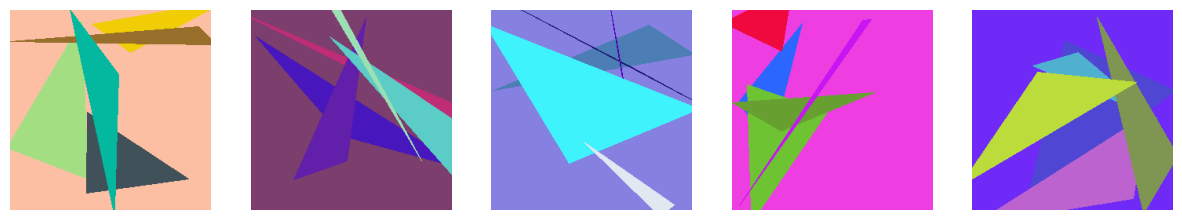

In [50]:
images = [generate_image(256, 256, 5, 0, 0, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

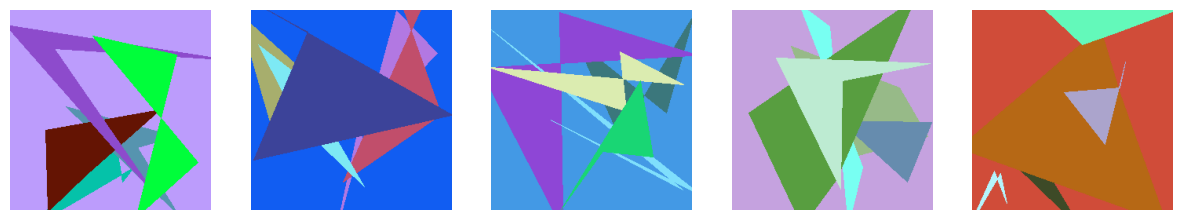

In [51]:
images = [generate_image(256, 256, 0, 5, 0, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

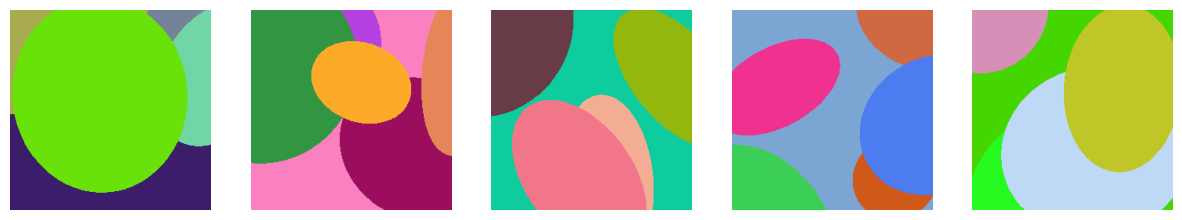

In [52]:
images = [generate_image(256, 256, 0, 0, 5, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

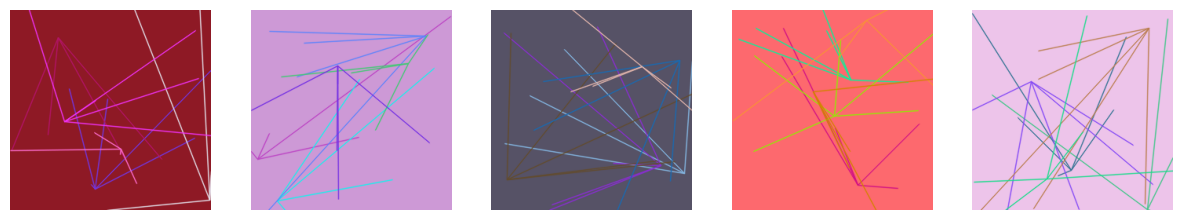

In [53]:
images = [generate_image(256, 256, 0, 0, 0, 5) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

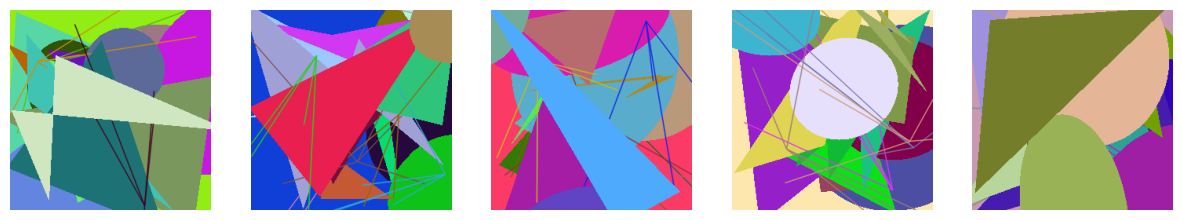

In [54]:
images = [generate_image(256, 256, 5, 5, 5, 5) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

In [55]:
def noise_add(image, sigma=None):
    if sigma is None:
        sigma = random.uniform(0.1, 0.3)
    noisy = image.astype(np.float32) + np.random.normal(0, sigma * 255, image.shape)
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def noise_mul(image, sigma=None):
    if sigma is None:
        sigma = random.uniform(0.1, 0.3)
    noisy = image.astype(np.float32) * np.random.normal(1, sigma, image.shape)
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

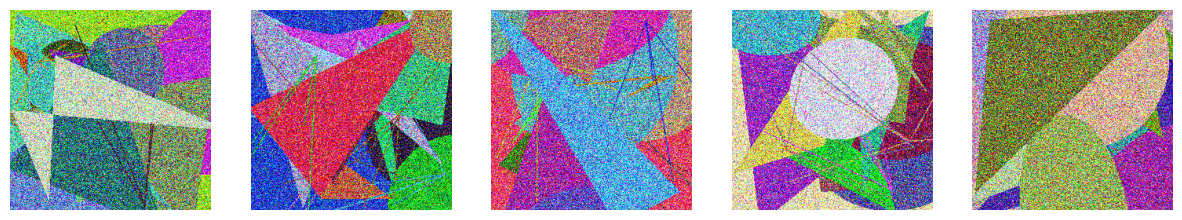

In [56]:
# noisy_images_additive = [noise_add(img, random.uniform(0.1, 0.3)) for img in images]
noisy_images_additive = [noise_add(img, 0.3) for img in images]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(noisy_images_additive[i])
    ax.set_axis_off()

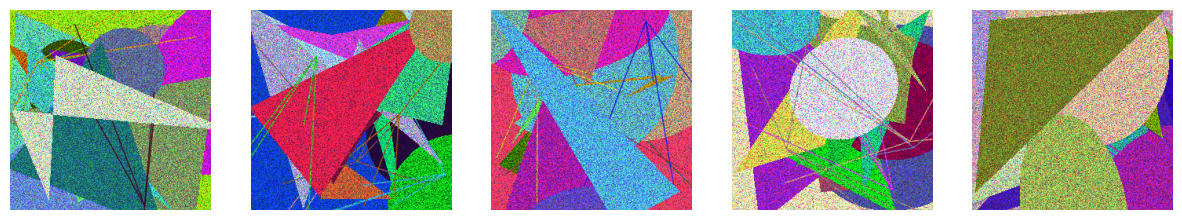

In [57]:
# noisy_images_multiplicative = [noise_mul(img, random.uniform(0.1, 0.3)) for img in images]
noisy_images_multiplicative = [noise_mul(img, 0.3) for img in images]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(noisy_images_multiplicative[i])
    ax.set_axis_off()

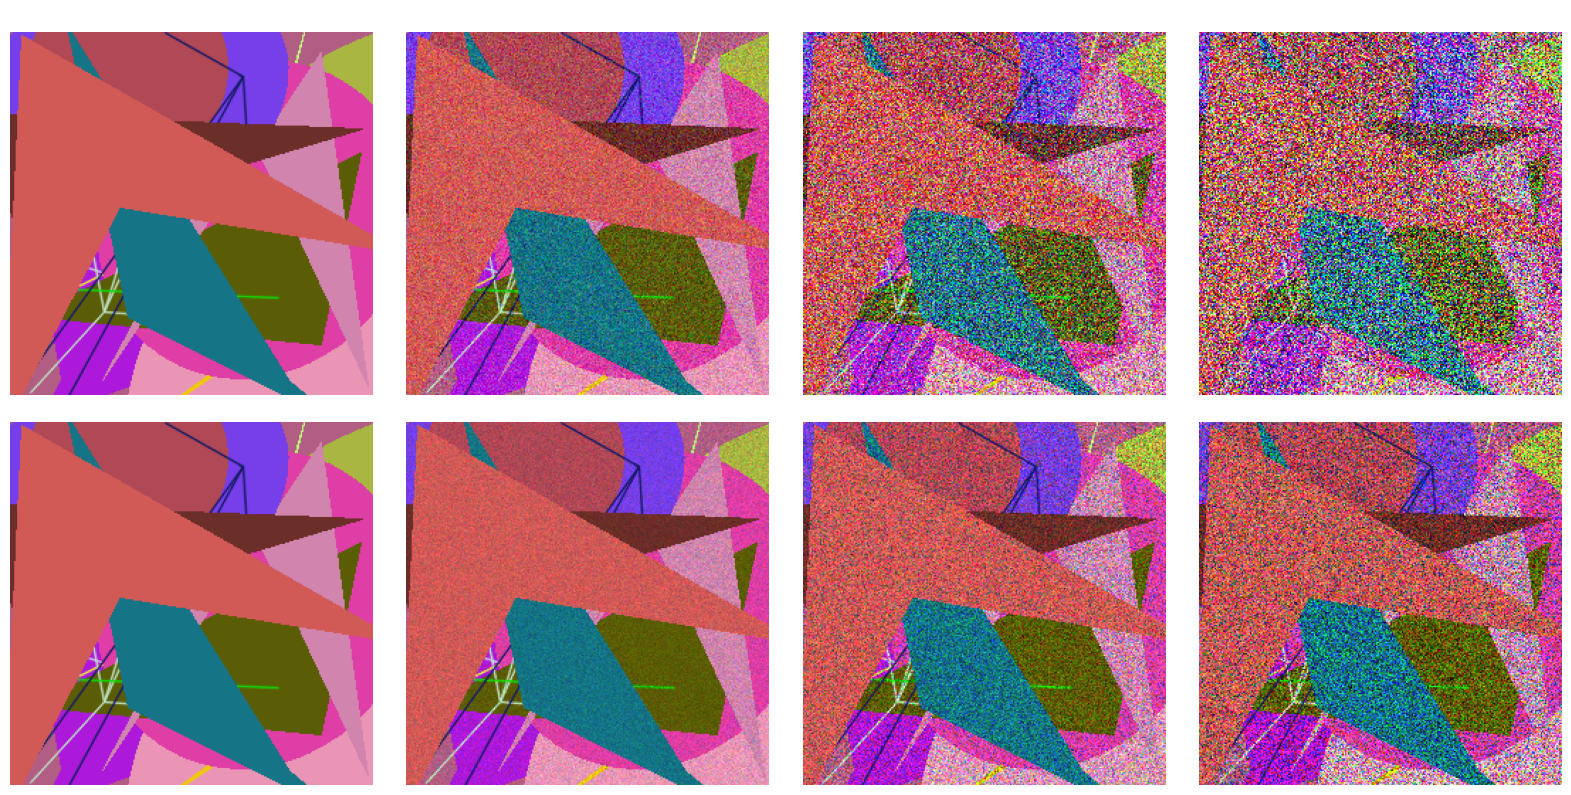

In [58]:
img = generate_image(256, 256, 5, 5, 5, 5)

noise_levels = [0.0, 0.1, 0.3, 0.5]
titles = ['No Noise', 'Noise 0.1', 'Noise 0.3', 'Noise 0.5']

fig, axes = plt.subplots(2, 4, figsize=(16, 8), facecolor='none')
for i, level in enumerate(noise_levels):
    if level == 0.0:
        axes[0, i].imshow(img)
    else:
        noisy = noise_add(img, level)
        axes[0, i].imshow(noisy)
    axes[0, i].set_title(f"Additive: {titles[i]}", color="white")
    axes[0, i].set_axis_off()

for i, level in enumerate(noise_levels):
    if level == 0.0:
        axes[1, i].imshow(img)
    else:
        noisy = noise_mul(img, level)
        axes[1, i].imshow(noisy)
    axes[1, i].set_title(f"Multiplicative: {titles[i]}", color="white")
    axes[1, i].set_axis_off()

plt.tight_layout()
plt.show()

In [59]:
class FilterBranch(nn.Module):
    def __init__(self):
        super(FilterBranch, self).__init__()
        self.R_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)
        self.G_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)
        self.B_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)

    def forward(self, x):
        # x: (B, 3, H, W)
        R = x[:, 0:1, :, :]  # (B, 1, H, W)
        G = x[:, 1:2, :, :]
        B = x[:, 2:3, :, :]

        Rf = self.R_conv(R)  # (B, 8, H, W)
        Gf = self.G_conv(G)
        Bf = self.B_conv(B)

        # Združimo rezultate v (B, 3, 8, H, W)
        filtered = torch.stack([Rf, Gf, Bf], dim=1)
        return filtered  # (B, 3, 8, H, W)


In [60]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels=None, stride=1,
                 dropout_rate=0.1):
        super(ResNetBlock, self).__init__()
        out_channels = out_channels or in_channels  # če ni določeno, ohrani enako št. kanalov

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        self.dropout = nn.Dropout2d(p=dropout_rate)
        self.relu = nn.ReLU(inplace=True)

        if in_channels != out_channels or stride != 1:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)

        out = self.conv1(x)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.dropout(out)
        out += residual

        out = self.relu(out)
        return out


In [61]:
class WeightBranch(nn.Module):
    def __init__(self,):
        super(WeightBranch, self).__init__()

        self.resnet1 = ResNetBlock(3, 32)
        self.resnet2 = ResNetBlock(32, 32)
        self.resnet3 = ResNetBlock(32, 32)

        self.final_conv = nn.Conv2d(32, 8, kernel_size=1)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # x shape: (B, 3, H, W)
        x = self.resnet1(x)
        x = self.resnet2(x)
        x = self.resnet3(x)
        x = self.final_conv(x)     # -> (B, 8, H, W)
        weights = self.softmax(x)  # -> (B, 8, H, W)
        return weights


In [62]:
class EdgePreservingDenoiser(nn.Module):
    def __init__(self):
        super(EdgePreservingDenoiser, self).__init__()
        self.filter_branch = FilterBranch()
        self.weight_branch = WeightBranch()

    def forward(self, x):
        # x shape: (B, 3, H, W)
        filtered = self.filter_branch(x)  # (B, 3, 8, H, W)
        weights = self.weight_branch(x)   # (B, 8, H, W)

        # Združi veje za vsak barvni kanal
        # Razširi weights za 3 kanale: (B, 1, 8, H, W)
        weights = weights.unsqueeze(1)    # (B, 1, 8, H, W)

        # Pomnožimo in seštejemo po 8 filtrih
        output = (filtered * weights).sum(dim=2)  # (B, 3, H, W)
        output = torch.clamp(output, 0.0, 1.0)

        return output

In [111]:
import torchinfo
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

model = EdgePreservingDenoiser().to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

num_epochs = 1000
batch_size = 40
num_samples = 1000

noise_fn = noise_add
# noise_fn = noise_mul

model_file_name = f"denoiser_bs{batch_size}_ep{num_epochs}_{noise_fn.__name__}.pth"

print(torchinfo.summary(model, [1, 3, 256, 256]))


Device:  cuda
Layer (type:depth-idx)                   Output Shape              Param #
EdgePreservingDenoiser                   [1, 3, 256, 256]          --
├─FilterBranch: 1-1                      [1, 3, 8, 256, 256]       --
│    └─Conv2d: 2-1                       [1, 8, 256, 256]          968
│    └─Conv2d: 2-2                       [1, 8, 256, 256]          968
│    └─Conv2d: 2-3                       [1, 8, 256, 256]          968
├─WeightBranch: 1-2                      [1, 8, 256, 256]          --
│    └─ResNetBlock: 2-4                  [1, 32, 256, 256]         --
│    │    └─Conv2d: 3-1                  [1, 32, 256, 256]         128
│    │    └─Conv2d: 3-2                  [1, 32, 256, 256]         896
│    │    └─Dropout2d: 3-3               [1, 32, 256, 256]         --
│    │    └─ReLU: 3-4                    [1, 32, 256, 256]         --
│    │    └─Conv2d: 3-5                  [1, 32, 256, 256]         9,248
│    │    └─Dropout2d: 3-6               [1, 32, 256, 256]     

In [64]:
from torch.utils.data import Dataset, DataLoader

class SyntheticNoiseDataset(Dataset):
    def __init__(self, num_samples=1000, noise_fn=noise_add, noise_range=(0.1, 0.3)):
        self.clean = []
        self.noisy = []
        for _ in range(num_samples):
            img = generate_image(256, 256, 5, 5, 5, 5)
            noisy = noise_fn(img, np.random.uniform(*noise_range))
            self.clean.append(torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32))
            self.noisy.append(torch.tensor(noisy.transpose(2, 0, 1), dtype=torch.float32))

    def __len__(self):
        return len(self.clean)

    def __getitem__(self, idx):
        return self.noisy[idx], self.clean[idx]


In [76]:
def nn_train(model, num_epochs, model_file_name, train_loader):
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        for noisy_batch, clean_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            noisy_batch, clean_batch = noisy_batch.to(device), clean_batch.to(device)
            optimizer.zero_grad()
            output = model(noisy_batch)
            loss = criterion(output, clean_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch+1} - Avg loss: {epoch_loss / len(train_loader):.6f}")

    torch.save(model.state_dict(), model_file_name)
    print("✅ Model shranjen.")

train_dataset = SyntheticNoiseDataset(num_samples=num_samples, noise_fn=noise_add)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

nn_train(model, num_epochs, model_file_name, train_loader)

Epoch 1/1000: 100%|██████████| 25/25 [00:07<00:00,  3.48it/s]


Epoch 1 - Avg loss: 21668.878203


Epoch 2/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 2 - Avg loss: 21668.876563


Epoch 3/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 3 - Avg loss: 21668.875234


Epoch 4/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 4 - Avg loss: 21668.873828


Epoch 5/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 5 - Avg loss: 21668.873125


Epoch 6/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 6 - Avg loss: 21668.872578


Epoch 7/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 7 - Avg loss: 21668.871875


Epoch 8/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 8 - Avg loss: 21668.871719


Epoch 9/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 9 - Avg loss: 21668.871250


Epoch 10/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 10 - Avg loss: 21668.870469


Epoch 11/1000: 100%|██████████| 25/25 [00:06<00:00,  3.66it/s]


Epoch 11 - Avg loss: 21668.870156


Epoch 12/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 12 - Avg loss: 21668.869766


Epoch 13/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 13 - Avg loss: 21668.869687


Epoch 14/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 14 - Avg loss: 21668.869609


Epoch 15/1000: 100%|██████████| 25/25 [00:06<00:00,  3.62it/s]


Epoch 15 - Avg loss: 21668.869219


Epoch 16/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 16 - Avg loss: 21668.868828


Epoch 17/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 17 - Avg loss: 21668.869297


Epoch 18/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 18 - Avg loss: 21668.868594


Epoch 19/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 19 - Avg loss: 21668.868828


Epoch 20/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 20 - Avg loss: 21668.868672


Epoch 21/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 21 - Avg loss: 21668.868125


Epoch 22/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 22 - Avg loss: 21668.867969


Epoch 23/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 23 - Avg loss: 21668.868203


Epoch 24/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 24 - Avg loss: 21668.868047


Epoch 25/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 25 - Avg loss: 21668.868594


Epoch 26/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 26 - Avg loss: 21668.867813


Epoch 27/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 27 - Avg loss: 21668.868359


Epoch 28/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 28 - Avg loss: 21668.867734


Epoch 29/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 29 - Avg loss: 21668.868125


Epoch 30/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 30 - Avg loss: 21668.867891


Epoch 31/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 31 - Avg loss: 21668.868125


Epoch 32/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 32 - Avg loss: 21668.867813


Epoch 33/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 33 - Avg loss: 21668.867656


Epoch 34/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 34 - Avg loss: 21668.867422


Epoch 35/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 35 - Avg loss: 21668.867500


Epoch 36/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 36 - Avg loss: 21668.867734


Epoch 37/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 37 - Avg loss: 21668.867891


Epoch 38/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 38 - Avg loss: 21668.867188


Epoch 39/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 39 - Avg loss: 21668.867188


Epoch 40/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 40 - Avg loss: 21668.867813


Epoch 41/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 41 - Avg loss: 21668.867813


Epoch 42/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 42 - Avg loss: 21668.867188


Epoch 43/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 43 - Avg loss: 21668.867500


Epoch 44/1000: 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]


Epoch 44 - Avg loss: 21668.867188


Epoch 45/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 45 - Avg loss: 21668.867109


Epoch 46/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 46 - Avg loss: 21668.867734


Epoch 47/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 47 - Avg loss: 21668.867344


Epoch 48/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 48 - Avg loss: 21668.867500


Epoch 49/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 49 - Avg loss: 21668.867422


Epoch 50/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 50 - Avg loss: 21668.867344


Epoch 51/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 51 - Avg loss: 21668.867188


Epoch 52/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 52 - Avg loss: 21668.867266


Epoch 53/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 53 - Avg loss: 21668.867422


Epoch 54/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 54 - Avg loss: 21668.867422


Epoch 55/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 55 - Avg loss: 21668.867188


Epoch 56/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 56 - Avg loss: 21668.867422


Epoch 57/1000: 100%|██████████| 25/25 [00:06<00:00,  3.62it/s]


Epoch 57 - Avg loss: 21668.867031


Epoch 58/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 58 - Avg loss: 21668.867656


Epoch 59/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 59 - Avg loss: 21668.867188


Epoch 60/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 60 - Avg loss: 21668.867266


Epoch 61/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 61 - Avg loss: 21668.867500


Epoch 62/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 62 - Avg loss: 21668.866875


Epoch 63/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 63 - Avg loss: 21668.867500


Epoch 64/1000: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


Epoch 64 - Avg loss: 21668.866953


Epoch 65/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 65 - Avg loss: 21668.867344


Epoch 66/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 66 - Avg loss: 21668.867422


Epoch 67/1000: 100%|██████████| 25/25 [00:06<00:00,  3.66it/s]


Epoch 67 - Avg loss: 21668.866719


Epoch 68/1000: 100%|██████████| 25/25 [00:07<00:00,  3.54it/s]


Epoch 68 - Avg loss: 21668.866953


Epoch 69/1000: 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]


Epoch 69 - Avg loss: 21668.866172


Epoch 70/1000: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


Epoch 70 - Avg loss: 21668.867109


Epoch 71/1000: 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]


Epoch 71 - Avg loss: 21668.867266


Epoch 72/1000: 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]


Epoch 72 - Avg loss: 21668.867500


Epoch 73/1000: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


Epoch 73 - Avg loss: 21668.867188


Epoch 74/1000: 100%|██████████| 25/25 [00:06<00:00,  3.62it/s]


Epoch 74 - Avg loss: 21668.867266


Epoch 75/1000: 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]


Epoch 75 - Avg loss: 21668.867188


Epoch 76/1000: 100%|██████████| 25/25 [00:06<00:00,  3.59it/s]


Epoch 76 - Avg loss: 21668.867344


Epoch 77/1000: 100%|██████████| 25/25 [00:07<00:00,  3.50it/s]


Epoch 77 - Avg loss: 21668.867109


Epoch 78/1000: 100%|██████████| 25/25 [00:07<00:00,  3.56it/s]


Epoch 78 - Avg loss: 21668.867266


Epoch 79/1000: 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]


Epoch 79 - Avg loss: 21668.867109


Epoch 80/1000: 100%|██████████| 25/25 [00:07<00:00,  3.38it/s]


Epoch 80 - Avg loss: 21668.867109


Epoch 81/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 81 - Avg loss: 21668.866797


Epoch 82/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 82 - Avg loss: 21668.867109


Epoch 83/1000: 100%|██████████| 25/25 [00:07<00:00,  3.43it/s]


Epoch 83 - Avg loss: 21668.866875


Epoch 84/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 84 - Avg loss: 21668.867188


Epoch 85/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 85 - Avg loss: 21668.867109


Epoch 86/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 86 - Avg loss: 21668.867266


Epoch 87/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 87 - Avg loss: 21668.867500


Epoch 88/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 88 - Avg loss: 21668.867266


Epoch 89/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 89 - Avg loss: 21668.867188


Epoch 90/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 90 - Avg loss: 21668.867188


Epoch 91/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 91 - Avg loss: 21668.867422


Epoch 92/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 92 - Avg loss: 21668.866719


Epoch 93/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 93 - Avg loss: 21668.867109


Epoch 94/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 94 - Avg loss: 21668.867188


Epoch 95/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 95 - Avg loss: 21668.866875


Epoch 96/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 96 - Avg loss: 21668.866641


Epoch 97/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 97 - Avg loss: 21668.867031


Epoch 98/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 98 - Avg loss: 21668.866953


Epoch 99/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 99 - Avg loss: 21668.866953


Epoch 100/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 100 - Avg loss: 21668.867109


Epoch 101/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 101 - Avg loss: 21668.866953


Epoch 102/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 102 - Avg loss: 21668.867109


Epoch 103/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 103 - Avg loss: 21668.867344


Epoch 104/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 104 - Avg loss: 21668.867266


Epoch 105/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 105 - Avg loss: 21668.867031


Epoch 106/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 106 - Avg loss: 21668.866875


Epoch 107/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 107 - Avg loss: 21668.867578


Epoch 108/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 108 - Avg loss: 21668.866875


Epoch 109/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 109 - Avg loss: 21668.866641


Epoch 110/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 110 - Avg loss: 21668.866719


Epoch 111/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 111 - Avg loss: 21668.866641


Epoch 112/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 112 - Avg loss: 21668.867188


Epoch 113/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 113 - Avg loss: 21668.867031


Epoch 114/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 114 - Avg loss: 21668.867188


Epoch 115/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 115 - Avg loss: 21668.867344


Epoch 116/1000: 100%|██████████| 25/25 [00:07<00:00,  3.46it/s]


Epoch 116 - Avg loss: 21668.867109


Epoch 117/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 117 - Avg loss: 21668.867109


Epoch 118/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 118 - Avg loss: 21668.867188


Epoch 119/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 119 - Avg loss: 21668.867031


Epoch 120/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 120 - Avg loss: 21668.866875


Epoch 121/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 121 - Avg loss: 21668.867188


Epoch 122/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 122 - Avg loss: 21668.866953


Epoch 123/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 123 - Avg loss: 21668.866953


Epoch 124/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 124 - Avg loss: 21668.867188


Epoch 125/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 125 - Avg loss: 21668.867188


Epoch 126/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 126 - Avg loss: 21668.866641


Epoch 127/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 127 - Avg loss: 21668.866719


Epoch 128/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 128 - Avg loss: 21668.866484


Epoch 129/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 129 - Avg loss: 21668.866875


Epoch 130/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 130 - Avg loss: 21668.867031


Epoch 131/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 131 - Avg loss: 21668.866953


Epoch 132/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 132 - Avg loss: 21668.867188


Epoch 133/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 133 - Avg loss: 21668.866562


Epoch 134/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 134 - Avg loss: 21668.866797


Epoch 135/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 135 - Avg loss: 21668.866875


Epoch 136/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 136 - Avg loss: 21668.867031


Epoch 137/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 137 - Avg loss: 21668.866641


Epoch 138/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 138 - Avg loss: 21668.867188


Epoch 139/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 139 - Avg loss: 21668.866797


Epoch 140/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 140 - Avg loss: 21668.867188


Epoch 141/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 141 - Avg loss: 21668.867031


Epoch 142/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 142 - Avg loss: 21668.867109


Epoch 143/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 143 - Avg loss: 21668.866797


Epoch 144/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 144 - Avg loss: 21668.866875


Epoch 145/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 145 - Avg loss: 21668.866875


Epoch 146/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 146 - Avg loss: 21668.867266


Epoch 147/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 147 - Avg loss: 21668.867344


Epoch 148/1000: 100%|██████████| 25/25 [00:07<00:00,  3.46it/s]


Epoch 148 - Avg loss: 21668.866953


Epoch 149/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 149 - Avg loss: 21668.866719


Epoch 150/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 150 - Avg loss: 21668.866953


Epoch 151/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 151 - Avg loss: 21668.866797


Epoch 152/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 152 - Avg loss: 21668.867344


Epoch 153/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 153 - Avg loss: 21668.866875


Epoch 154/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 154 - Avg loss: 21668.867344


Epoch 155/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 155 - Avg loss: 21668.866875


Epoch 156/1000: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Epoch 156 - Avg loss: 21668.866797


Epoch 157/1000: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


Epoch 157 - Avg loss: 21668.867188


Epoch 158/1000: 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]


Epoch 158 - Avg loss: 21668.867344


Epoch 159/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 159 - Avg loss: 21668.867188


Epoch 160/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 160 - Avg loss: 21668.867109


Epoch 161/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 161 - Avg loss: 21668.867266


Epoch 162/1000: 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


Epoch 162 - Avg loss: 21668.866562


Epoch 163/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 163 - Avg loss: 21668.866875


Epoch 164/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 164 - Avg loss: 21668.866875


Epoch 165/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 165 - Avg loss: 21668.866875


Epoch 166/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 166 - Avg loss: 21668.866875


Epoch 167/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 167 - Avg loss: 21668.867109


Epoch 168/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 168 - Avg loss: 21668.866797


Epoch 169/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 169 - Avg loss: 21668.867031


Epoch 170/1000: 100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


Epoch 170 - Avg loss: 21668.867500


Epoch 171/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 171 - Avg loss: 21668.866719


Epoch 172/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 172 - Avg loss: 21668.866797


Epoch 173/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 173 - Avg loss: 21668.867109


Epoch 174/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 174 - Avg loss: 21668.867031


Epoch 175/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 175 - Avg loss: 21668.866562


Epoch 176/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 176 - Avg loss: 21668.866797


Epoch 177/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 177 - Avg loss: 21668.866797


Epoch 178/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 178 - Avg loss: 21668.866484


Epoch 179/1000: 100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


Epoch 179 - Avg loss: 21668.866875


Epoch 180/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 180 - Avg loss: 21668.867422


Epoch 181/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 181 - Avg loss: 21668.866875


Epoch 182/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 182 - Avg loss: 21668.867188


Epoch 183/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 183 - Avg loss: 21668.866797


Epoch 184/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 184 - Avg loss: 21668.866875


Epoch 185/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 185 - Avg loss: 21668.867031


Epoch 186/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 186 - Avg loss: 21668.866953


Epoch 187/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 187 - Avg loss: 21668.866953


Epoch 188/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 188 - Avg loss: 21668.866641


Epoch 189/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 189 - Avg loss: 21668.866953


Epoch 190/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 190 - Avg loss: 21668.867031


Epoch 191/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 191 - Avg loss: 21668.866797


Epoch 192/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 192 - Avg loss: 21668.866797


Epoch 193/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 193 - Avg loss: 21668.866953


Epoch 194/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 194 - Avg loss: 21668.866719


Epoch 195/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 195 - Avg loss: 21668.866797


Epoch 196/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 196 - Avg loss: 21668.867031


Epoch 197/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 197 - Avg loss: 21668.867266


Epoch 198/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 198 - Avg loss: 21668.866953


Epoch 199/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 199 - Avg loss: 21668.866641


Epoch 200/1000: 100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


Epoch 200 - Avg loss: 21668.866953


Epoch 201/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 201 - Avg loss: 21668.866719


Epoch 202/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 202 - Avg loss: 21668.866797


Epoch 203/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 203 - Avg loss: 21668.866875


Epoch 204/1000: 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


Epoch 204 - Avg loss: 21668.866953


Epoch 205/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 205 - Avg loss: 21668.866406


Epoch 206/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 206 - Avg loss: 21668.866953


Epoch 207/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 207 - Avg loss: 21668.867031


Epoch 208/1000: 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


Epoch 208 - Avg loss: 21668.866875


Epoch 209/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 209 - Avg loss: 21668.866406


Epoch 210/1000: 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


Epoch 210 - Avg loss: 21668.866719


Epoch 211/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 211 - Avg loss: 21668.866719


Epoch 212/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 212 - Avg loss: 21668.867031


Epoch 213/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 213 - Avg loss: 21668.866875


Epoch 214/1000: 100%|██████████| 25/25 [00:06<00:00,  3.75it/s]


Epoch 214 - Avg loss: 21668.866953


Epoch 215/1000: 100%|██████████| 25/25 [00:06<00:00,  3.71it/s]


Epoch 215 - Avg loss: 21668.867344


Epoch 216/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 216 - Avg loss: 21668.867109


Epoch 217/1000: 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


Epoch 217 - Avg loss: 21668.867266


Epoch 218/1000: 100%|██████████| 25/25 [00:06<00:00,  3.68it/s]


Epoch 218 - Avg loss: 21668.866484


Epoch 219/1000: 100%|██████████| 25/25 [00:06<00:00,  3.69it/s]


Epoch 219 - Avg loss: 21668.867266


Epoch 220/1000: 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


Epoch 220 - Avg loss: 21668.866484


Epoch 221/1000: 100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


Epoch 221 - Avg loss: 21668.866953


Epoch 222/1000: 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


Epoch 222 - Avg loss: 21668.866562


Epoch 223/1000: 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


Epoch 223 - Avg loss: 21668.866953


Epoch 224/1000: 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]


Epoch 224 - Avg loss: 21668.866797


Epoch 225/1000: 100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


Epoch 225 - Avg loss: 21668.866641


Epoch 226/1000: 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]


Epoch 226 - Avg loss: 21668.866953


Epoch 227/1000: 100%|██████████| 25/25 [00:06<00:00,  3.69it/s]


Epoch 227 - Avg loss: 21668.866953


Epoch 228/1000: 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]


Epoch 228 - Avg loss: 21668.867188


Epoch 229/1000: 100%|██████████| 25/25 [00:05<00:00,  4.64it/s]


Epoch 229 - Avg loss: 21668.866797


Epoch 230/1000: 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


Epoch 230 - Avg loss: 21668.866875


Epoch 231/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 231 - Avg loss: 21668.866797


Epoch 232/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 232 - Avg loss: 21668.866562


Epoch 233/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 233 - Avg loss: 21668.866797


Epoch 234/1000: 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


Epoch 234 - Avg loss: 21668.866562


Epoch 235/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 235 - Avg loss: 21668.866953


Epoch 236/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 236 - Avg loss: 21668.866562


Epoch 237/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 237 - Avg loss: 21668.866484


Epoch 238/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 238 - Avg loss: 21668.866719


Epoch 239/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 239 - Avg loss: 21668.867188


Epoch 240/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 240 - Avg loss: 21668.866797


Epoch 241/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 241 - Avg loss: 21668.866953


Epoch 242/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 242 - Avg loss: 21668.866719


Epoch 243/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 243 - Avg loss: 21668.867031


Epoch 244/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 244 - Avg loss: 21668.867266


Epoch 245/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 245 - Avg loss: 21668.866562


Epoch 246/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 246 - Avg loss: 21668.866953


Epoch 247/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 247 - Avg loss: 21668.867266


Epoch 248/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 248 - Avg loss: 21668.867188


Epoch 249/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 249 - Avg loss: 21668.867031


Epoch 250/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 250 - Avg loss: 21668.866953


Epoch 251/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 251 - Avg loss: 21668.866562


Epoch 252/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 252 - Avg loss: 21668.866562


Epoch 253/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 253 - Avg loss: 21668.866719


Epoch 254/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 254 - Avg loss: 21668.866953


Epoch 255/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 255 - Avg loss: 21668.867031


Epoch 256/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 256 - Avg loss: 21668.866953


Epoch 257/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 257 - Avg loss: 21668.866953


Epoch 258/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 258 - Avg loss: 21668.866641


Epoch 259/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 259 - Avg loss: 21668.867266


Epoch 260/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 260 - Avg loss: 21668.866562


Epoch 261/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 261 - Avg loss: 21668.866641


Epoch 262/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 262 - Avg loss: 21668.866875


Epoch 263/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 263 - Avg loss: 21668.866953


Epoch 264/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 264 - Avg loss: 21668.866875


Epoch 265/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 265 - Avg loss: 21668.866875


Epoch 266/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 266 - Avg loss: 21668.866875


Epoch 267/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 267 - Avg loss: 21668.866719


Epoch 268/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 268 - Avg loss: 21668.867188


Epoch 269/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 269 - Avg loss: 21668.866719


Epoch 270/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 270 - Avg loss: 21668.867109


Epoch 271/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 271 - Avg loss: 21668.866875


Epoch 272/1000: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


Epoch 272 - Avg loss: 21668.867109


Epoch 273/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 273 - Avg loss: 21668.866641


Epoch 274/1000: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


Epoch 274 - Avg loss: 21668.866797


Epoch 275/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 275 - Avg loss: 21668.866719


Epoch 276/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 276 - Avg loss: 21668.866719


Epoch 277/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 277 - Avg loss: 21668.866641


Epoch 278/1000: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


Epoch 278 - Avg loss: 21668.866875


Epoch 279/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 279 - Avg loss: 21668.866797


Epoch 280/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 280 - Avg loss: 21668.867109


Epoch 281/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 281 - Avg loss: 21668.866797


Epoch 282/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 282 - Avg loss: 21668.866641


Epoch 283/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 283 - Avg loss: 21668.867109


Epoch 284/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 284 - Avg loss: 21668.866641


Epoch 285/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 285 - Avg loss: 21668.867188


Epoch 286/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 286 - Avg loss: 21668.867109


Epoch 287/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 287 - Avg loss: 21668.867109


Epoch 288/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 288 - Avg loss: 21668.866797


Epoch 289/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 289 - Avg loss: 21668.867344


Epoch 290/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 290 - Avg loss: 21668.867109


Epoch 291/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 291 - Avg loss: 21668.866719


Epoch 292/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 292 - Avg loss: 21668.866953


Epoch 293/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 293 - Avg loss: 21668.867031


Epoch 294/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 294 - Avg loss: 21668.866719


Epoch 295/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 295 - Avg loss: 21668.866719


Epoch 296/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 296 - Avg loss: 21668.867266


Epoch 297/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 297 - Avg loss: 21668.867109


Epoch 298/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 298 - Avg loss: 21668.866797


Epoch 299/1000: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


Epoch 299 - Avg loss: 21668.866797


Epoch 300/1000: 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


Epoch 300 - Avg loss: 21668.866953


Epoch 301/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 301 - Avg loss: 21668.867031


Epoch 302/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 302 - Avg loss: 21668.866875


Epoch 303/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 303 - Avg loss: 21668.867266


Epoch 304/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 304 - Avg loss: 21668.866797


Epoch 305/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 305 - Avg loss: 21668.867031


Epoch 306/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 306 - Avg loss: 21668.866641


Epoch 307/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 307 - Avg loss: 21668.866719


Epoch 308/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 308 - Avg loss: 21668.866953


Epoch 309/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 309 - Avg loss: 21668.866953


Epoch 310/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 310 - Avg loss: 21668.866953


Epoch 311/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 311 - Avg loss: 21668.866953


Epoch 312/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 312 - Avg loss: 21668.867109


Epoch 313/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 313 - Avg loss: 21668.866953


Epoch 314/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 314 - Avg loss: 21668.867109


Epoch 315/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 315 - Avg loss: 21668.867344


Epoch 316/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 316 - Avg loss: 21668.866953


Epoch 317/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 317 - Avg loss: 21668.867031


Epoch 318/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 318 - Avg loss: 21668.866875


Epoch 319/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 319 - Avg loss: 21668.866719


Epoch 320/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 320 - Avg loss: 21668.867109


Epoch 321/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 321 - Avg loss: 21668.867266


Epoch 322/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 322 - Avg loss: 21668.867031


Epoch 323/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 323 - Avg loss: 21668.867031


Epoch 324/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 324 - Avg loss: 21668.866797


Epoch 325/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 325 - Avg loss: 21668.866797


Epoch 326/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 326 - Avg loss: 21668.866562


Epoch 327/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 327 - Avg loss: 21668.866719


Epoch 328/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 328 - Avg loss: 21668.867031


Epoch 329/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 329 - Avg loss: 21668.866641


Epoch 330/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 330 - Avg loss: 21668.866641


Epoch 331/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 331 - Avg loss: 21668.866797


Epoch 332/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 332 - Avg loss: 21668.867188


Epoch 333/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 333 - Avg loss: 21668.866641


Epoch 334/1000: 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


Epoch 334 - Avg loss: 21668.866562


Epoch 335/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 335 - Avg loss: 21668.867031


Epoch 336/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 336 - Avg loss: 21668.866875


Epoch 337/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 337 - Avg loss: 21668.867031


Epoch 338/1000: 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


Epoch 338 - Avg loss: 21668.867188


Epoch 339/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 339 - Avg loss: 21668.866953


Epoch 340/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 340 - Avg loss: 21668.866953


Epoch 341/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 341 - Avg loss: 21668.867109


Epoch 342/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 342 - Avg loss: 21668.866875


Epoch 343/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 343 - Avg loss: 21668.866562


Epoch 344/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 344 - Avg loss: 21668.866641


Epoch 345/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 345 - Avg loss: 21668.866250


Epoch 346/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 346 - Avg loss: 21668.866562


Epoch 347/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 347 - Avg loss: 21668.866953


Epoch 348/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 348 - Avg loss: 21668.866953


Epoch 349/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 349 - Avg loss: 21668.867031


Epoch 350/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 350 - Avg loss: 21668.867031


Epoch 351/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 351 - Avg loss: 21668.867031


Epoch 352/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 352 - Avg loss: 21668.867344


Epoch 353/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 353 - Avg loss: 21668.866719


Epoch 354/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 354 - Avg loss: 21668.867031


Epoch 355/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 355 - Avg loss: 21668.866875


Epoch 356/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 356 - Avg loss: 21668.866719


Epoch 357/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 357 - Avg loss: 21668.867266


Epoch 358/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 358 - Avg loss: 21668.866875


Epoch 359/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 359 - Avg loss: 21668.866953


Epoch 360/1000: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


Epoch 360 - Avg loss: 21668.867109


Epoch 361/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 361 - Avg loss: 21668.866641


Epoch 362/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 362 - Avg loss: 21668.866719


Epoch 363/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 363 - Avg loss: 21668.866875


Epoch 364/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 364 - Avg loss: 21668.866641


Epoch 365/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 365 - Avg loss: 21668.866797


Epoch 366/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 366 - Avg loss: 21668.867031


Epoch 367/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 367 - Avg loss: 21668.866797


Epoch 368/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 368 - Avg loss: 21668.866562


Epoch 369/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 369 - Avg loss: 21668.866641


Epoch 370/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 370 - Avg loss: 21668.866719


Epoch 371/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 371 - Avg loss: 21668.867188


Epoch 372/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 372 - Avg loss: 21668.866953


Epoch 373/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 373 - Avg loss: 21668.867109


Epoch 374/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 374 - Avg loss: 21668.866797


Epoch 375/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 375 - Avg loss: 21668.866641


Epoch 376/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 376 - Avg loss: 21668.866484


Epoch 377/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 377 - Avg loss: 21668.867500


Epoch 378/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 378 - Avg loss: 21668.866875


Epoch 379/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 379 - Avg loss: 21668.866875


Epoch 380/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 380 - Avg loss: 21668.866875


Epoch 381/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 381 - Avg loss: 21668.866875


Epoch 382/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 382 - Avg loss: 21668.866875


Epoch 383/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 383 - Avg loss: 21668.867109


Epoch 384/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 384 - Avg loss: 21668.866562


Epoch 385/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 385 - Avg loss: 21668.866562


Epoch 386/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 386 - Avg loss: 21668.866641


Epoch 387/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 387 - Avg loss: 21668.867109


Epoch 388/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 388 - Avg loss: 21668.866797


Epoch 389/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 389 - Avg loss: 21668.866953


Epoch 390/1000: 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


Epoch 390 - Avg loss: 21668.866875


Epoch 391/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 391 - Avg loss: 21668.866875


Epoch 392/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 392 - Avg loss: 21668.866875


Epoch 393/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 393 - Avg loss: 21668.866641


Epoch 394/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 394 - Avg loss: 21668.866953


Epoch 395/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 395 - Avg loss: 21668.867109


Epoch 396/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 396 - Avg loss: 21668.866875


Epoch 397/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 397 - Avg loss: 21668.866797


Epoch 398/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 398 - Avg loss: 21668.866719


Epoch 399/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 399 - Avg loss: 21668.867188


Epoch 400/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 400 - Avg loss: 21668.866797


Epoch 401/1000: 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


Epoch 401 - Avg loss: 21668.866953


Epoch 402/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 402 - Avg loss: 21668.867109


Epoch 403/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 403 - Avg loss: 21668.867188


Epoch 404/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 404 - Avg loss: 21668.866797


Epoch 405/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 405 - Avg loss: 21668.866875


Epoch 406/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 406 - Avg loss: 21668.867109


Epoch 407/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 407 - Avg loss: 21668.866875


Epoch 408/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 408 - Avg loss: 21668.866875


Epoch 409/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 409 - Avg loss: 21668.866953


Epoch 410/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 410 - Avg loss: 21668.867031


Epoch 411/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 411 - Avg loss: 21668.866953


Epoch 412/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 412 - Avg loss: 21668.867109


Epoch 413/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 413 - Avg loss: 21668.866484


Epoch 414/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 414 - Avg loss: 21668.866953


Epoch 415/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 415 - Avg loss: 21668.866953


Epoch 416/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 416 - Avg loss: 21668.866953


Epoch 417/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 417 - Avg loss: 21668.867188


Epoch 418/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 418 - Avg loss: 21668.867031


Epoch 419/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 419 - Avg loss: 21668.866719


Epoch 420/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 420 - Avg loss: 21668.867031


Epoch 421/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 421 - Avg loss: 21668.866953


Epoch 422/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 422 - Avg loss: 21668.867031


Epoch 423/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 423 - Avg loss: 21668.866641


Epoch 424/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 424 - Avg loss: 21668.867109


Epoch 425/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 425 - Avg loss: 21668.866484


Epoch 426/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 426 - Avg loss: 21668.866953


Epoch 427/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 427 - Avg loss: 21668.866562


Epoch 428/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 428 - Avg loss: 21668.866797


Epoch 429/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 429 - Avg loss: 21668.866797


Epoch 430/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 430 - Avg loss: 21668.866953


Epoch 431/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 431 - Avg loss: 21668.866797


Epoch 432/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 432 - Avg loss: 21668.866641


Epoch 433/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 433 - Avg loss: 21668.867266


Epoch 434/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 434 - Avg loss: 21668.867031


Epoch 435/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 435 - Avg loss: 21668.866562


Epoch 436/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 436 - Avg loss: 21668.866875


Epoch 437/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 437 - Avg loss: 21668.866719


Epoch 438/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 438 - Avg loss: 21668.866953


Epoch 439/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 439 - Avg loss: 21668.867031


Epoch 440/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 440 - Avg loss: 21668.867031


Epoch 441/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 441 - Avg loss: 21668.867188


Epoch 442/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 442 - Avg loss: 21668.866797


Epoch 443/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 443 - Avg loss: 21668.866641


Epoch 444/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 444 - Avg loss: 21668.867344


Epoch 445/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 445 - Avg loss: 21668.866797


Epoch 446/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 446 - Avg loss: 21668.866719


Epoch 447/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 447 - Avg loss: 21668.867266


Epoch 448/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 448 - Avg loss: 21668.866719


Epoch 449/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 449 - Avg loss: 21668.866875


Epoch 450/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 450 - Avg loss: 21668.866719


Epoch 451/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 451 - Avg loss: 21668.867344


Epoch 452/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 452 - Avg loss: 21668.867031


Epoch 453/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 453 - Avg loss: 21668.866953


Epoch 454/1000: 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


Epoch 454 - Avg loss: 21668.867031


Epoch 455/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 455 - Avg loss: 21668.866875


Epoch 456/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 456 - Avg loss: 21668.866641


Epoch 457/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 457 - Avg loss: 21668.866328


Epoch 458/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 458 - Avg loss: 21668.866953


Epoch 459/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 459 - Avg loss: 21668.866797


Epoch 460/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 460 - Avg loss: 21668.866875


Epoch 461/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 461 - Avg loss: 21668.867266


Epoch 462/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 462 - Avg loss: 21668.866719


Epoch 463/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 463 - Avg loss: 21668.866953


Epoch 464/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 464 - Avg loss: 21668.866953


Epoch 465/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 465 - Avg loss: 21668.866797


Epoch 466/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 466 - Avg loss: 21668.866953


Epoch 467/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 467 - Avg loss: 21668.867031


Epoch 468/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 468 - Avg loss: 21668.866328


Epoch 469/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 469 - Avg loss: 21668.866875


Epoch 470/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 470 - Avg loss: 21668.866562


Epoch 471/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 471 - Avg loss: 21668.866875


Epoch 472/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 472 - Avg loss: 21668.866875


Epoch 473/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 473 - Avg loss: 21668.867188


Epoch 474/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 474 - Avg loss: 21668.866875


Epoch 475/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 475 - Avg loss: 21668.867109


Epoch 476/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 476 - Avg loss: 21668.866875


Epoch 477/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 477 - Avg loss: 21668.867031


Epoch 478/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 478 - Avg loss: 21668.867188


Epoch 479/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 479 - Avg loss: 21668.867109


Epoch 480/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 480 - Avg loss: 21668.867188


Epoch 481/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 481 - Avg loss: 21668.866953


Epoch 482/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 482 - Avg loss: 21668.867188


Epoch 483/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 483 - Avg loss: 21668.867031


Epoch 484/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 484 - Avg loss: 21668.867188


Epoch 485/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 485 - Avg loss: 21668.866719


Epoch 486/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 486 - Avg loss: 21668.867109


Epoch 487/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 487 - Avg loss: 21668.866953


Epoch 488/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 488 - Avg loss: 21668.867422


Epoch 489/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 489 - Avg loss: 21668.866797


Epoch 490/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 490 - Avg loss: 21668.866875


Epoch 491/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 491 - Avg loss: 21668.866797


Epoch 492/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 492 - Avg loss: 21668.866641


Epoch 493/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 493 - Avg loss: 21668.867031


Epoch 494/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 494 - Avg loss: 21668.866797


Epoch 495/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 495 - Avg loss: 21668.867188


Epoch 496/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 496 - Avg loss: 21668.866797


Epoch 497/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 497 - Avg loss: 21668.866406


Epoch 498/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 498 - Avg loss: 21668.866797


Epoch 499/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 499 - Avg loss: 21668.867109


Epoch 500/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 500 - Avg loss: 21668.867188


Epoch 501/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 501 - Avg loss: 21668.866797


Epoch 502/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 502 - Avg loss: 21668.866875


Epoch 503/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 503 - Avg loss: 21668.867188


Epoch 504/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 504 - Avg loss: 21668.867188


Epoch 505/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 505 - Avg loss: 21668.867344


Epoch 506/1000: 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


Epoch 506 - Avg loss: 21668.867109


Epoch 507/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 507 - Avg loss: 21668.867031


Epoch 508/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 508 - Avg loss: 21668.866953


Epoch 509/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 509 - Avg loss: 21668.866875


Epoch 510/1000: 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


Epoch 510 - Avg loss: 21668.866875


Epoch 511/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 511 - Avg loss: 21668.866875


Epoch 512/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 512 - Avg loss: 21668.867031


Epoch 513/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 513 - Avg loss: 21668.866484


Epoch 514/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 514 - Avg loss: 21668.866953


Epoch 515/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 515 - Avg loss: 21668.866641


Epoch 516/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 516 - Avg loss: 21668.866719


Epoch 517/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 517 - Avg loss: 21668.866641


Epoch 518/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 518 - Avg loss: 21668.866875


Epoch 519/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 519 - Avg loss: 21668.867344


Epoch 520/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 520 - Avg loss: 21668.866797


Epoch 521/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 521 - Avg loss: 21668.866719


Epoch 522/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 522 - Avg loss: 21668.866562


Epoch 523/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 523 - Avg loss: 21668.866562


Epoch 524/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 524 - Avg loss: 21668.866484


Epoch 525/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 525 - Avg loss: 21668.866797


Epoch 526/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 526 - Avg loss: 21668.866562


Epoch 527/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 527 - Avg loss: 21668.867031


Epoch 528/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 528 - Avg loss: 21668.866719


Epoch 529/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 529 - Avg loss: 21668.866797


Epoch 530/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 530 - Avg loss: 21668.867031


Epoch 531/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 531 - Avg loss: 21668.866797


Epoch 532/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 532 - Avg loss: 21668.867188


Epoch 533/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 533 - Avg loss: 21668.867031


Epoch 534/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 534 - Avg loss: 21668.867109


Epoch 535/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 535 - Avg loss: 21668.867031


Epoch 536/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 536 - Avg loss: 21668.866719


Epoch 537/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 537 - Avg loss: 21668.867188


Epoch 538/1000: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


Epoch 538 - Avg loss: 21668.866719


Epoch 539/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 539 - Avg loss: 21668.866797


Epoch 540/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 540 - Avg loss: 21668.866875


Epoch 541/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 541 - Avg loss: 21668.866562


Epoch 542/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 542 - Avg loss: 21668.867266


Epoch 543/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 543 - Avg loss: 21668.867031


Epoch 544/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 544 - Avg loss: 21668.866641


Epoch 545/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 545 - Avg loss: 21668.866953


Epoch 546/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 546 - Avg loss: 21668.866797


Epoch 547/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 547 - Avg loss: 21668.866797


Epoch 548/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 548 - Avg loss: 21668.866875


Epoch 549/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 549 - Avg loss: 21668.866641


Epoch 550/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 550 - Avg loss: 21668.866562


Epoch 551/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 551 - Avg loss: 21668.866875


Epoch 552/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 552 - Avg loss: 21668.867109


Epoch 553/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 553 - Avg loss: 21668.866953


Epoch 554/1000: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


Epoch 554 - Avg loss: 21668.866953


Epoch 555/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 555 - Avg loss: 21668.867031


Epoch 556/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 556 - Avg loss: 21668.866562


Epoch 557/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 557 - Avg loss: 21668.866406


Epoch 558/1000: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


Epoch 558 - Avg loss: 21668.866641


Epoch 559/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 559 - Avg loss: 21668.866641


Epoch 560/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 560 - Avg loss: 21668.866875


Epoch 561/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 561 - Avg loss: 21668.867109


Epoch 562/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 562 - Avg loss: 21668.866953


Epoch 563/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 563 - Avg loss: 21668.866953


Epoch 564/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 564 - Avg loss: 21668.866562


Epoch 565/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 565 - Avg loss: 21668.867031


Epoch 566/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 566 - Avg loss: 21668.866719


Epoch 567/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 567 - Avg loss: 21668.866719


Epoch 568/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 568 - Avg loss: 21668.866875


Epoch 569/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 569 - Avg loss: 21668.866797


Epoch 570/1000: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


Epoch 570 - Avg loss: 21668.866953


Epoch 571/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 571 - Avg loss: 21668.867031


Epoch 572/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 572 - Avg loss: 21668.866875


Epoch 573/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 573 - Avg loss: 21668.867188


Epoch 574/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 574 - Avg loss: 21668.867188


Epoch 575/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 575 - Avg loss: 21668.866797


Epoch 576/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 576 - Avg loss: 21668.867266


Epoch 577/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 577 - Avg loss: 21668.867266


Epoch 578/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 578 - Avg loss: 21668.867109


Epoch 579/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 579 - Avg loss: 21668.866719


Epoch 580/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 580 - Avg loss: 21668.867109


Epoch 581/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 581 - Avg loss: 21668.866797


Epoch 582/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 582 - Avg loss: 21668.867109


Epoch 583/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 583 - Avg loss: 21668.866484


Epoch 584/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 584 - Avg loss: 21668.866953


Epoch 585/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 585 - Avg loss: 21668.866719


Epoch 586/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 586 - Avg loss: 21668.866797


Epoch 587/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 587 - Avg loss: 21668.866719


Epoch 588/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 588 - Avg loss: 21668.866797


Epoch 589/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 589 - Avg loss: 21668.866484


Epoch 590/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 590 - Avg loss: 21668.867266


Epoch 591/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 591 - Avg loss: 21668.866953


Epoch 592/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 592 - Avg loss: 21668.867031


Epoch 593/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 593 - Avg loss: 21668.867188


Epoch 594/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 594 - Avg loss: 21668.866641


Epoch 595/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 595 - Avg loss: 21668.866719


Epoch 596/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 596 - Avg loss: 21668.866953


Epoch 597/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 597 - Avg loss: 21668.866953


Epoch 598/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 598 - Avg loss: 21668.867109


Epoch 599/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 599 - Avg loss: 21668.867109


Epoch 600/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 600 - Avg loss: 21668.866875


Epoch 601/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 601 - Avg loss: 21668.867031


Epoch 602/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 602 - Avg loss: 21668.866094


Epoch 603/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 603 - Avg loss: 21668.866953


Epoch 604/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 604 - Avg loss: 21668.866953


Epoch 605/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 605 - Avg loss: 21668.866641


Epoch 606/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 606 - Avg loss: 21668.866953


Epoch 607/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 607 - Avg loss: 21668.867031


Epoch 608/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 608 - Avg loss: 21668.866797


Epoch 609/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 609 - Avg loss: 21668.867109


Epoch 610/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 610 - Avg loss: 21668.866953


Epoch 611/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 611 - Avg loss: 21668.867031


Epoch 612/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 612 - Avg loss: 21668.866562


Epoch 613/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 613 - Avg loss: 21668.866406


Epoch 614/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 614 - Avg loss: 21668.866875


Epoch 615/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 615 - Avg loss: 21668.866719


Epoch 616/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 616 - Avg loss: 21668.867188


Epoch 617/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 617 - Avg loss: 21668.866719


Epoch 618/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 618 - Avg loss: 21668.867109


Epoch 619/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 619 - Avg loss: 21668.866641


Epoch 620/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 620 - Avg loss: 21668.866562


Epoch 621/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 621 - Avg loss: 21668.866797


Epoch 622/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 622 - Avg loss: 21668.866797


Epoch 623/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 623 - Avg loss: 21668.866797


Epoch 624/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 624 - Avg loss: 21668.866953


Epoch 625/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 625 - Avg loss: 21668.867109


Epoch 626/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 626 - Avg loss: 21668.866875


Epoch 627/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 627 - Avg loss: 21668.866719


Epoch 628/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 628 - Avg loss: 21668.867109


Epoch 629/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 629 - Avg loss: 21668.867344


Epoch 630/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 630 - Avg loss: 21668.866641


Epoch 631/1000: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


Epoch 631 - Avg loss: 21668.866719


Epoch 632/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 632 - Avg loss: 21668.867109


Epoch 633/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 633 - Avg loss: 21668.866797


Epoch 634/1000: 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


Epoch 634 - Avg loss: 21668.866875


Epoch 635/1000: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


Epoch 635 - Avg loss: 21668.866953


Epoch 636/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 636 - Avg loss: 21668.866641


Epoch 637/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 637 - Avg loss: 21668.866875


Epoch 638/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 638 - Avg loss: 21668.867188


Epoch 639/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 639 - Avg loss: 21668.867109


Epoch 640/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 640 - Avg loss: 21668.866875


Epoch 641/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 641 - Avg loss: 21668.866875


Epoch 642/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 642 - Avg loss: 21668.866641


Epoch 643/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 643 - Avg loss: 21668.866797


Epoch 644/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 644 - Avg loss: 21668.866797


Epoch 645/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 645 - Avg loss: 21668.867188


Epoch 646/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 646 - Avg loss: 21668.866875


Epoch 647/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 647 - Avg loss: 21668.866562


Epoch 648/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 648 - Avg loss: 21668.866641


Epoch 649/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 649 - Avg loss: 21668.867266


Epoch 650/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 650 - Avg loss: 21668.866875


Epoch 651/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 651 - Avg loss: 21668.866797


Epoch 652/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 652 - Avg loss: 21668.867031


Epoch 653/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 653 - Avg loss: 21668.867031


Epoch 654/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 654 - Avg loss: 21668.866719


Epoch 655/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 655 - Avg loss: 21668.866719


Epoch 656/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 656 - Avg loss: 21668.866797


Epoch 657/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 657 - Avg loss: 21668.866953


Epoch 658/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 658 - Avg loss: 21668.866953


Epoch 659/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 659 - Avg loss: 21668.867109


Epoch 660/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 660 - Avg loss: 21668.866797


Epoch 661/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 661 - Avg loss: 21668.866641


Epoch 662/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 662 - Avg loss: 21668.866797


Epoch 663/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 663 - Avg loss: 21668.867031


Epoch 664/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 664 - Avg loss: 21668.866328


Epoch 665/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 665 - Avg loss: 21668.867188


Epoch 666/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 666 - Avg loss: 21668.866875


Epoch 667/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 667 - Avg loss: 21668.866875


Epoch 668/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 668 - Avg loss: 21668.866875


Epoch 669/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 669 - Avg loss: 21668.867031


Epoch 670/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 670 - Avg loss: 21668.867188


Epoch 671/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 671 - Avg loss: 21668.867031


Epoch 672/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 672 - Avg loss: 21668.866797


Epoch 673/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 673 - Avg loss: 21668.866875


Epoch 674/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 674 - Avg loss: 21668.866953


Epoch 675/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 675 - Avg loss: 21668.867031


Epoch 676/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 676 - Avg loss: 21668.867422


Epoch 677/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 677 - Avg loss: 21668.866875


Epoch 678/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 678 - Avg loss: 21668.866875


Epoch 679/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 679 - Avg loss: 21668.867031


Epoch 680/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 680 - Avg loss: 21668.866641


Epoch 681/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 681 - Avg loss: 21668.866875


Epoch 682/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 682 - Avg loss: 21668.866953


Epoch 683/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 683 - Avg loss: 21668.867344


Epoch 684/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 684 - Avg loss: 21668.867422


Epoch 685/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 685 - Avg loss: 21668.867188


Epoch 686/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 686 - Avg loss: 21668.866719


Epoch 687/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 687 - Avg loss: 21668.867031


Epoch 688/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 688 - Avg loss: 21668.867109


Epoch 689/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 689 - Avg loss: 21668.866719


Epoch 690/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 690 - Avg loss: 21668.867109


Epoch 691/1000: 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


Epoch 691 - Avg loss: 21668.867031


Epoch 692/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 692 - Avg loss: 21668.866719


Epoch 693/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 693 - Avg loss: 21668.867188


Epoch 694/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 694 - Avg loss: 21668.866719


Epoch 695/1000: 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


Epoch 695 - Avg loss: 21668.866406


Epoch 696/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 696 - Avg loss: 21668.866562


Epoch 697/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 697 - Avg loss: 21668.866953


Epoch 698/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 698 - Avg loss: 21668.866797


Epoch 699/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 699 - Avg loss: 21668.866562


Epoch 700/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 700 - Avg loss: 21668.867031


Epoch 701/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 701 - Avg loss: 21668.867422


Epoch 702/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 702 - Avg loss: 21668.866875


Epoch 703/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 703 - Avg loss: 21668.867031


Epoch 704/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 704 - Avg loss: 21668.866484


Epoch 705/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 705 - Avg loss: 21668.867188


Epoch 706/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 706 - Avg loss: 21668.866953


Epoch 707/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 707 - Avg loss: 21668.866641


Epoch 708/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 708 - Avg loss: 21668.867031


Epoch 709/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 709 - Avg loss: 21668.866875


Epoch 710/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 710 - Avg loss: 21668.866719


Epoch 711/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 711 - Avg loss: 21668.866719


Epoch 712/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 712 - Avg loss: 21668.866641


Epoch 713/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 713 - Avg loss: 21668.867188


Epoch 714/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 714 - Avg loss: 21668.867031


Epoch 715/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 715 - Avg loss: 21668.867031


Epoch 716/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 716 - Avg loss: 21668.866484


Epoch 717/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 717 - Avg loss: 21668.866797


Epoch 718/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 718 - Avg loss: 21668.866719


Epoch 719/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 719 - Avg loss: 21668.866484


Epoch 720/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 720 - Avg loss: 21668.867031


Epoch 721/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 721 - Avg loss: 21668.867188


Epoch 722/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 722 - Avg loss: 21668.866797


Epoch 723/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 723 - Avg loss: 21668.866562


Epoch 724/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 724 - Avg loss: 21668.866797


Epoch 725/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 725 - Avg loss: 21668.867266


Epoch 726/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 726 - Avg loss: 21668.866875


Epoch 727/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 727 - Avg loss: 21668.866953


Epoch 728/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 728 - Avg loss: 21668.866797


Epoch 729/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 729 - Avg loss: 21668.866797


Epoch 730/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 730 - Avg loss: 21668.866953


Epoch 731/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 731 - Avg loss: 21668.867188


Epoch 732/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 732 - Avg loss: 21668.866797


Epoch 733/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 733 - Avg loss: 21668.866875


Epoch 734/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 734 - Avg loss: 21668.866875


Epoch 735/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 735 - Avg loss: 21668.866641


Epoch 736/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 736 - Avg loss: 21668.867109


Epoch 737/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 737 - Avg loss: 21668.867109


Epoch 738/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 738 - Avg loss: 21668.867109


Epoch 739/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 739 - Avg loss: 21668.866641


Epoch 740/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 740 - Avg loss: 21668.866719


Epoch 741/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 741 - Avg loss: 21668.867031


Epoch 742/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 742 - Avg loss: 21668.866875


Epoch 743/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 743 - Avg loss: 21668.866406


Epoch 744/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 744 - Avg loss: 21668.866641


Epoch 745/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 745 - Avg loss: 21668.867031


Epoch 746/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 746 - Avg loss: 21668.866953


Epoch 747/1000: 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


Epoch 747 - Avg loss: 21668.866875


Epoch 748/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 748 - Avg loss: 21668.866641


Epoch 749/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 749 - Avg loss: 21668.866719


Epoch 750/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 750 - Avg loss: 21668.866953


Epoch 751/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 751 - Avg loss: 21668.866953


Epoch 752/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 752 - Avg loss: 21668.867031


Epoch 753/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 753 - Avg loss: 21668.866953


Epoch 754/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 754 - Avg loss: 21668.866953


Epoch 755/1000: 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


Epoch 755 - Avg loss: 21668.866719


Epoch 756/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 756 - Avg loss: 21668.867266


Epoch 757/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 757 - Avg loss: 21668.867266


Epoch 758/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 758 - Avg loss: 21668.866641


Epoch 759/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 759 - Avg loss: 21668.866953


Epoch 760/1000: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


Epoch 760 - Avg loss: 21668.866641


Epoch 761/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 761 - Avg loss: 21668.866797


Epoch 762/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 762 - Avg loss: 21668.866875


Epoch 763/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 763 - Avg loss: 21668.866641


Epoch 764/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 764 - Avg loss: 21668.867031


Epoch 765/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 765 - Avg loss: 21668.866484


Epoch 766/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 766 - Avg loss: 21668.866875


Epoch 767/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 767 - Avg loss: 21668.866953


Epoch 768/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 768 - Avg loss: 21668.866953


Epoch 769/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 769 - Avg loss: 21668.866875


Epoch 770/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 770 - Avg loss: 21668.867031


Epoch 771/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 771 - Avg loss: 21668.866484


Epoch 772/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 772 - Avg loss: 21668.866562


Epoch 773/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 773 - Avg loss: 21668.866875


Epoch 774/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 774 - Avg loss: 21668.866719


Epoch 775/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 775 - Avg loss: 21668.866562


Epoch 776/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 776 - Avg loss: 21668.866641


Epoch 777/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 777 - Avg loss: 21668.866797


Epoch 778/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 778 - Avg loss: 21668.866875


Epoch 779/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 779 - Avg loss: 21668.866797


Epoch 780/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 780 - Avg loss: 21668.866953


Epoch 781/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 781 - Avg loss: 21668.867109


Epoch 782/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 782 - Avg loss: 21668.866797


Epoch 783/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 783 - Avg loss: 21668.866719


Epoch 784/1000: 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]


Epoch 784 - Avg loss: 21668.866875


Epoch 785/1000: 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]


Epoch 785 - Avg loss: 21668.866953


Epoch 786/1000: 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]


Epoch 786 - Avg loss: 21668.866641


Epoch 787/1000: 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]


Epoch 787 - Avg loss: 21668.867031


Epoch 788/1000: 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


Epoch 788 - Avg loss: 21668.867031


Epoch 789/1000: 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


Epoch 789 - Avg loss: 21668.867031


Epoch 790/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 790 - Avg loss: 21668.867109


Epoch 791/1000: 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


Epoch 791 - Avg loss: 21668.866875


Epoch 792/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 792 - Avg loss: 21668.866562


Epoch 793/1000: 100%|██████████| 25/25 [00:05<00:00,  4.49it/s]


Epoch 793 - Avg loss: 21668.867109


Epoch 794/1000: 100%|██████████| 25/25 [00:05<00:00,  4.60it/s]


Epoch 794 - Avg loss: 21668.866328


Epoch 795/1000: 100%|██████████| 25/25 [00:05<00:00,  4.55it/s]


Epoch 795 - Avg loss: 21668.867031


Epoch 796/1000: 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]


Epoch 796 - Avg loss: 21668.866797


Epoch 797/1000: 100%|██████████| 25/25 [00:05<00:00,  4.69it/s]


Epoch 797 - Avg loss: 21668.866797


Epoch 798/1000: 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]


Epoch 798 - Avg loss: 21668.866875


Epoch 799/1000: 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]


Epoch 799 - Avg loss: 21668.866953


Epoch 800/1000: 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]


Epoch 800 - Avg loss: 21668.867109


Epoch 801/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 801 - Avg loss: 21668.866875


Epoch 802/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 802 - Avg loss: 21668.867031


Epoch 803/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 803 - Avg loss: 21668.866797


Epoch 804/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 804 - Avg loss: 21668.866719


Epoch 805/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 805 - Avg loss: 21668.867188


Epoch 806/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 806 - Avg loss: 21668.866797


Epoch 807/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 807 - Avg loss: 21668.866797


Epoch 808/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 808 - Avg loss: 21668.866797


Epoch 809/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 809 - Avg loss: 21668.867031


Epoch 810/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 810 - Avg loss: 21668.866406


Epoch 811/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 811 - Avg loss: 21668.866641


Epoch 812/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 812 - Avg loss: 21668.866875


Epoch 813/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 813 - Avg loss: 21668.866875


Epoch 814/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 814 - Avg loss: 21668.866875


Epoch 815/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 815 - Avg loss: 21668.866641


Epoch 816/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 816 - Avg loss: 21668.866953


Epoch 817/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 817 - Avg loss: 21668.866797


Epoch 818/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 818 - Avg loss: 21668.866797


Epoch 819/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 819 - Avg loss: 21668.866953


Epoch 820/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 820 - Avg loss: 21668.867188


Epoch 821/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 821 - Avg loss: 21668.866953


Epoch 822/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 822 - Avg loss: 21668.866953


Epoch 823/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 823 - Avg loss: 21668.866797


Epoch 824/1000: 100%|██████████| 25/25 [00:05<00:00,  4.69it/s]


Epoch 824 - Avg loss: 21668.866953


Epoch 825/1000: 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]


Epoch 825 - Avg loss: 21668.866719


Epoch 826/1000: 100%|██████████| 25/25 [00:05<00:00,  4.75it/s]


Epoch 826 - Avg loss: 21668.866875


Epoch 827/1000: 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


Epoch 827 - Avg loss: 21668.867188


Epoch 828/1000: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


Epoch 828 - Avg loss: 21668.866875


Epoch 829/1000: 100%|██████████| 25/25 [00:05<00:00,  4.60it/s]


Epoch 829 - Avg loss: 21668.867109


Epoch 830/1000: 100%|██████████| 25/25 [00:05<00:00,  4.62it/s]


Epoch 830 - Avg loss: 21668.867109


Epoch 831/1000: 100%|██████████| 25/25 [00:05<00:00,  4.62it/s]


Epoch 831 - Avg loss: 21668.866875


Epoch 832/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 832 - Avg loss: 21668.867031


Epoch 833/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 833 - Avg loss: 21668.866797


Epoch 834/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 834 - Avg loss: 21668.866953


Epoch 835/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 835 - Avg loss: 21668.866875


Epoch 836/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 836 - Avg loss: 21668.867266


Epoch 837/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 837 - Avg loss: 21668.866875


Epoch 838/1000: 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


Epoch 838 - Avg loss: 21668.866953


Epoch 839/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 839 - Avg loss: 21668.867266


Epoch 840/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 840 - Avg loss: 21668.866641


Epoch 841/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 841 - Avg loss: 21668.866562


Epoch 842/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 842 - Avg loss: 21668.866953


Epoch 843/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 843 - Avg loss: 21668.866797


Epoch 844/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 844 - Avg loss: 21668.867109


Epoch 845/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 845 - Avg loss: 21668.867266


Epoch 846/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 846 - Avg loss: 21668.866797


Epoch 847/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 847 - Avg loss: 21668.866328


Epoch 848/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 848 - Avg loss: 21668.866406


Epoch 849/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 849 - Avg loss: 21668.866875


Epoch 850/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 850 - Avg loss: 21668.866875


Epoch 851/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 851 - Avg loss: 21668.867031


Epoch 852/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 852 - Avg loss: 21668.866484


Epoch 853/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 853 - Avg loss: 21668.866562


Epoch 854/1000: 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


Epoch 854 - Avg loss: 21668.866953


Epoch 855/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 855 - Avg loss: 21668.866953


Epoch 856/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 856 - Avg loss: 21668.866797


Epoch 857/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 857 - Avg loss: 21668.867109


Epoch 858/1000: 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


Epoch 858 - Avg loss: 21668.866719


Epoch 859/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 859 - Avg loss: 21668.866562


Epoch 860/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 860 - Avg loss: 21668.867344


Epoch 861/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 861 - Avg loss: 21668.866562


Epoch 862/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 862 - Avg loss: 21668.866875


Epoch 863/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 863 - Avg loss: 21668.866719


Epoch 864/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 864 - Avg loss: 21668.867031


Epoch 865/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 865 - Avg loss: 21668.866875


Epoch 866/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 866 - Avg loss: 21668.867266


Epoch 867/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 867 - Avg loss: 21668.866641


Epoch 868/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 868 - Avg loss: 21668.866875


Epoch 869/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 869 - Avg loss: 21668.866719


Epoch 870/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 870 - Avg loss: 21668.866953


Epoch 871/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 871 - Avg loss: 21668.866953


Epoch 872/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 872 - Avg loss: 21668.866562


Epoch 873/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 873 - Avg loss: 21668.866797


Epoch 874/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 874 - Avg loss: 21668.866953


Epoch 875/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 875 - Avg loss: 21668.867109


Epoch 876/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 876 - Avg loss: 21668.867031


Epoch 877/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 877 - Avg loss: 21668.867109


Epoch 878/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 878 - Avg loss: 21668.866797


Epoch 879/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 879 - Avg loss: 21668.866719


Epoch 880/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 880 - Avg loss: 21668.866875


Epoch 881/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 881 - Avg loss: 21668.866875


Epoch 882/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 882 - Avg loss: 21668.866562


Epoch 883/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 883 - Avg loss: 21668.867109


Epoch 884/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 884 - Avg loss: 21668.866641


Epoch 885/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 885 - Avg loss: 21668.866953


Epoch 886/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 886 - Avg loss: 21668.866406


Epoch 887/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 887 - Avg loss: 21668.866953


Epoch 888/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 888 - Avg loss: 21668.866797


Epoch 889/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 889 - Avg loss: 21668.867266


Epoch 890/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 890 - Avg loss: 21668.866875


Epoch 891/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 891 - Avg loss: 21668.866953


Epoch 892/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 892 - Avg loss: 21668.866641


Epoch 893/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 893 - Avg loss: 21668.866875


Epoch 894/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 894 - Avg loss: 21668.866797


Epoch 895/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 895 - Avg loss: 21668.867109


Epoch 896/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 896 - Avg loss: 21668.867031


Epoch 897/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 897 - Avg loss: 21668.866562


Epoch 898/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 898 - Avg loss: 21668.866797


Epoch 899/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 899 - Avg loss: 21668.867109


Epoch 900/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 900 - Avg loss: 21668.866484


Epoch 901/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 901 - Avg loss: 21668.867109


Epoch 902/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 902 - Avg loss: 21668.867422


Epoch 903/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 903 - Avg loss: 21668.867266


Epoch 904/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 904 - Avg loss: 21668.866875


Epoch 905/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 905 - Avg loss: 21668.866719


Epoch 906/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 906 - Avg loss: 21668.867031


Epoch 907/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 907 - Avg loss: 21668.866953


Epoch 908/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 908 - Avg loss: 21668.866953


Epoch 909/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 909 - Avg loss: 21668.866719


Epoch 910/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 910 - Avg loss: 21668.867109


Epoch 911/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 911 - Avg loss: 21668.866719


Epoch 912/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 912 - Avg loss: 21668.867031


Epoch 913/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 913 - Avg loss: 21668.866797


Epoch 914/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 914 - Avg loss: 21668.866641


Epoch 915/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 915 - Avg loss: 21668.866953


Epoch 916/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 916 - Avg loss: 21668.866719


Epoch 917/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 917 - Avg loss: 21668.867031


Epoch 918/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 918 - Avg loss: 21668.866250


Epoch 919/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 919 - Avg loss: 21668.866719


Epoch 920/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 920 - Avg loss: 21668.867109


Epoch 921/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 921 - Avg loss: 21668.866641


Epoch 922/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 922 - Avg loss: 21668.866562


Epoch 923/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 923 - Avg loss: 21668.867422


Epoch 924/1000: 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]


Epoch 924 - Avg loss: 21668.866875


Epoch 925/1000: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]


Epoch 925 - Avg loss: 21668.867266


Epoch 926/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 926 - Avg loss: 21668.866953


Epoch 927/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 927 - Avg loss: 21668.867109


Epoch 928/1000: 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]


Epoch 928 - Avg loss: 21668.866328


Epoch 929/1000: 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


Epoch 929 - Avg loss: 21668.866875


Epoch 930/1000: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


Epoch 930 - Avg loss: 21668.866484


Epoch 931/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 931 - Avg loss: 21668.867031


Epoch 932/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 932 - Avg loss: 21668.866719


Epoch 933/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 933 - Avg loss: 21668.866875


Epoch 934/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 934 - Avg loss: 21668.867188


Epoch 935/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 935 - Avg loss: 21668.866875


Epoch 936/1000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 936 - Avg loss: 21668.866953


Epoch 937/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 937 - Avg loss: 21668.866875


Epoch 938/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 938 - Avg loss: 21668.867109


Epoch 939/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 939 - Avg loss: 21668.866641


Epoch 940/1000: 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


Epoch 940 - Avg loss: 21668.866875


Epoch 941/1000: 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


Epoch 941 - Avg loss: 21668.866875


Epoch 942/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 942 - Avg loss: 21668.866797


Epoch 943/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 943 - Avg loss: 21668.866797


Epoch 944/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 944 - Avg loss: 21668.866641


Epoch 945/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 945 - Avg loss: 21668.866953


Epoch 946/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 946 - Avg loss: 21668.866484


Epoch 947/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 947 - Avg loss: 21668.866797


Epoch 948/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 948 - Avg loss: 21668.866562


Epoch 949/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 949 - Avg loss: 21668.866953


Epoch 950/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 950 - Avg loss: 21668.866562


Epoch 951/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 951 - Avg loss: 21668.866953


Epoch 952/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 952 - Avg loss: 21668.866406


Epoch 953/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 953 - Avg loss: 21668.866797


Epoch 954/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 954 - Avg loss: 21668.866719


Epoch 955/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 955 - Avg loss: 21668.867109


Epoch 956/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 956 - Avg loss: 21668.867109


Epoch 957/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 957 - Avg loss: 21668.867188


Epoch 958/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 958 - Avg loss: 21668.866797


Epoch 959/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 959 - Avg loss: 21668.866875


Epoch 960/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 960 - Avg loss: 21668.866484


Epoch 961/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 961 - Avg loss: 21668.866406


Epoch 962/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 962 - Avg loss: 21668.866719


Epoch 963/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 963 - Avg loss: 21668.866641


Epoch 964/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 964 - Avg loss: 21668.866719


Epoch 965/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 965 - Avg loss: 21668.866641


Epoch 966/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 966 - Avg loss: 21668.866719


Epoch 967/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 967 - Avg loss: 21668.866875


Epoch 968/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 968 - Avg loss: 21668.866875


Epoch 969/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 969 - Avg loss: 21668.867109


Epoch 970/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 970 - Avg loss: 21668.867188


Epoch 971/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 971 - Avg loss: 21668.866562


Epoch 972/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 972 - Avg loss: 21668.866953


Epoch 973/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 973 - Avg loss: 21668.867031


Epoch 974/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


Epoch 974 - Avg loss: 21668.866797


Epoch 975/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 975 - Avg loss: 21668.867109


Epoch 976/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 976 - Avg loss: 21668.866875


Epoch 977/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 977 - Avg loss: 21668.866953


Epoch 978/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 978 - Avg loss: 21668.867031


Epoch 979/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 979 - Avg loss: 21668.867266


Epoch 980/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 980 - Avg loss: 21668.866719


Epoch 981/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 981 - Avg loss: 21668.866953


Epoch 982/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 982 - Avg loss: 21668.866953


Epoch 983/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 983 - Avg loss: 21668.866953


Epoch 984/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 984 - Avg loss: 21668.866562


Epoch 985/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 985 - Avg loss: 21668.866953


Epoch 986/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 986 - Avg loss: 21668.866953


Epoch 987/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 987 - Avg loss: 21668.866875


Epoch 988/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 988 - Avg loss: 21668.867031


Epoch 989/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 989 - Avg loss: 21668.866953


Epoch 990/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 990 - Avg loss: 21668.866797


Epoch 991/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 991 - Avg loss: 21668.867188


Epoch 992/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 992 - Avg loss: 21668.867109


Epoch 993/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 993 - Avg loss: 21668.866484


Epoch 994/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 994 - Avg loss: 21668.867109


Epoch 995/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 995 - Avg loss: 21668.866875


Epoch 996/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 996 - Avg loss: 21668.866875


Epoch 997/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 997 - Avg loss: 21668.866641


Epoch 998/1000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 998 - Avg loss: 21668.866797


Epoch 999/1000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 999 - Avg loss: 21668.866953


Epoch 1000/1000: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]

Epoch 1000 - Avg loss: 21668.867031
✅ Model shranjen.


In [115]:
def psnr_torch(img, recon, max_val=1.0, eps=1e-10):
    mse = torch.mean((img - recon) ** 2)
    mse = torch.clamp(mse, min=eps)
    return 20.0 * torch.log10(torch.tensor(max_val)) - 10.0 * torch.log10(mse)

def snr_torch(clean, recon, eps=1e-10):
    signal_power = torch.mean(clean ** 2)
    noise_power = torch.mean((clean - recon) ** 2)
    noise_power = torch.clamp(noise_power, min=eps)
    return 10.0 * torch.log10(signal_power / noise_power)

def nn_test_single(model, img_np, noise_fn, noise_level):
    model.eval()
    noisy_np = noise_fn(img_np, noise_level)  # uint8 0..255

    # convert to tensor (C,H,W) and batch, keep in 0..255 range for pretrained model
    clean_t = torch.tensor(img_np.transpose(2,0,1), dtype=torch.float32).unsqueeze(0).to(device)
    noisy_t = torch.tensor(noisy_np.transpose(2,0,1), dtype=torch.float32).unsqueeze(0).to(device)

    with torch.no_grad():
        out_t = model(noisy_t)  # model outputs 0..1 due to clamp(0.0, 1.0) in architecture

    # Model outputs 0..1, so scale back to 0..255 for comparison and display
    out_t_scaled = out_t * 255.0

    clean_t_cpu = clean_t.cpu().squeeze(0)
    noisy_t_cpu = noisy_t.cpu().squeeze(0)
    out_t_cpu = out_t_scaled.cpu().squeeze(0)

    psnr_noisy = psnr_torch(clean_t_cpu, noisy_t_cpu, max_val=255.0).item()
    snr_noisy = snr_torch(clean_t_cpu, noisy_t_cpu).item()

    psnr_denoised = psnr_torch(clean_t_cpu, out_t_cpu, max_val=255.0).item()
    snr_denoised = snr_torch(clean_t_cpu, out_t_cpu).item()

    metrics = {
        "psnr_noisy": psnr_noisy,
        "snr_noisy": snr_noisy,
        "psnr_denoised": psnr_denoised,
        "snr_denoised": snr_denoised
    }

    # convert output to 0..255 uint8 for display
    out_np = np.clip(out_t_cpu.numpy().transpose(1,2,0), 0, 255).astype(np.uint8)

    return img_np, noisy_np, out_np, metrics


denoiser_bs40_ep1000_noise_add.pth
Denosied:  uint8
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]
Denosied:  uint8
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


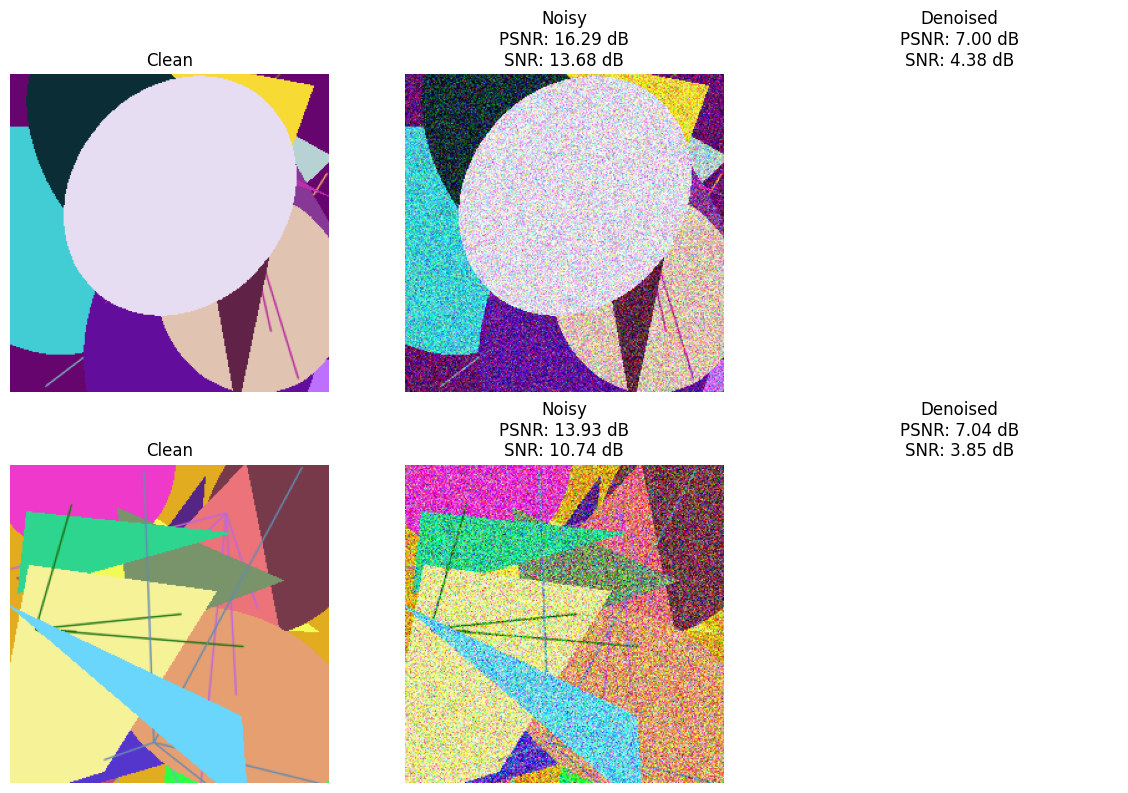

Average PSNR (noisy): 15.113588333129883
Average PSNR (denoised): 7.020805358886719
Average SNR  (noisy): 12.211187362670898
Average SNR  (denoised): 4.11840295791626


In [118]:
# Testiranje

state = torch.load(model_file_name, map_location=device)
print(model_file_name)
model.load_state_dict(state)
model.to(device)
model.eval()

num_of_tests = 2

fig, axes = plt.subplots(num_of_tests, 3, figsize=(12, 4 * num_of_tests))

psnr_noisy_list = []
psnr_denoised_list = []
snr_noisy_list = []
snr_denoised_list = []

for i in range(num_of_tests):
    img = generate_image(256, 256, 5, 5, 5, 5)
    clean, noisy, denoised, metrics = nn_test_single(model, img, noise_fn, np.random.uniform(0.1, 0.3))
    print("Denosied: ", denoised.dtype)
    print(denoised[0,0:5])

    psnr_noisy_list.append(metrics["psnr_noisy"])
    psnr_denoised_list.append(metrics["psnr_denoised"])
    snr_noisy_list.append(metrics["snr_noisy"])
    snr_denoised_list.append(metrics["snr_denoised"])

    ax0 = axes[i, 0]; ax1 = axes[i, 1]; ax2 = axes[i, 2]
    ax0.imshow(clean); ax0.set_title("Clean"); ax0.axis("off")
    ax1.imshow(noisy); ax1.set_title(f"Noisy\nPSNR: {metrics['psnr_noisy']:.2f} dB\nSNR: {metrics['snr_noisy']:.2f} dB"); ax1.axis("off")
    ax2.imshow(denoised); ax2.set_title(f"Denoised\nPSNR: {metrics['psnr_denoised']:.2f} dB\nSNR: {metrics['snr_denoised']:.2f} dB"); ax2.axis("off")

plt.tight_layout()
plt.show()

print("Average PSNR (noisy):", np.mean(psnr_noisy_list))
print("Average PSNR (denoised):", np.mean(psnr_denoised_list))
print("Average SNR  (noisy):", np.mean(snr_noisy_list))
print("Average SNR  (denoised):", np.mean(snr_denoised_list))

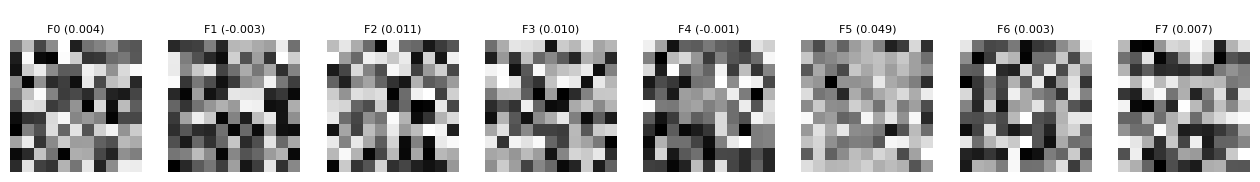

torch.Size([8, 11, 11])


In [107]:
import matplotlib.pyplot as plt

def get_channel_filters(model, channel: str = 'R', show: bool = True):
    fb = model.filter_branch
    if channel == 'R':
        conv = fb.R_conv
    elif channel == 'G':
        conv = fb.G_conv
    elif channel == 'B':
        conv = fb.B_conv
    else:
        raise ValueError("channel mora biti eden izmed: 'R', 'G', 'B'")

    weights = conv.weight.data.cpu().squeeze(1)  # (8, 11, 11)

    if show:
        n_filters = weights.shape[0]
        n_cols = min(8, n_filters)
        n_rows = (n_filters + n_cols - 1) // n_cols

        plt.figure(figsize=(n_cols * 2, n_rows * 2))
        for i in range(n_filters):
            plt.subplot(n_rows, n_cols, i + 1)
            plt.imshow(weights[i], cmap='gray')
            plt.axis('off')
            # Display mean weight value in title
            mean_weight = weights[i].mean().item()
            plt.title(f'F{i} ({mean_weight:.3f})', fontsize=8)
        plt.suptitle(f'FilterBranch – kanal {channel}', color='white')
        plt.show()

    return weights

b_filters = get_channel_filters(model, 'B', show=True)
print(b_filters.shape)

